In [1]:
from __future__ import print_function, division
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import requests



%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Downloaded the .csv file from the source, uploaded directly to PUIdata folder
#os.getenv(varname[, value])
rides = np.load(os.getenv("PUIDATA")+
                               "/MTA_Fare.npy")


In [3]:
#Return the shape of an array
np.ma.shape(rides)
#rides[0:2]

(600, 23, 194)

In [4]:
#Convert to float and change -1 to nan
rides = rides.astype(numpy.float, copy = False)
rides[rides == -1] = np.nan

In [5]:
print ("using nanmean on rides: " + str (np.nanmean(rides)))
print ("regular mean on rides: " + str (np.mean(rides)))

using nanmean on rides: 2849.41627865
regular mean on rides: nan


In [6]:
#Subway ridetype array
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [7]:
#Return a fixed frequency datetime index, with day (calendar) as the default 
#frequency by week
#date_rng = pd.date_range('5/21/2010', '2/21/2014', freq='w')
date_rng = pd.date_range('5/21/2010', periods=194, freq='w')
date_rng[:5]

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [8]:
print (rides.shape) #all dimensions
rides_mean0 = np.nanmean(rides, axis=0)
rides_allsum0 = np.nansum(rides, axis=0) #Axis along which the sum is cmptd is 0
print (rides_allsum0.shape)
rides_mean1 = np.nanmean(rides, axis=1)
rides_allsum1= np.nansum(rides, axis=1) #Axis along which the sum is cmptd is 1
print (rides_allsum1.shape)
len(rides_allsum0)

(600, 23, 194)
(23, 194)
(600, 194)


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


23

In [9]:
all_mtrides = np.nansum(rides_allsum0, axis=0)
all_mtrides.shape
#all_mta_stns = np.nansum(rides, axis=0)
#len(all_mta_stns)

(194,)

In [10]:
#ride_types = np.nansum(rides, axis=1)
#all_mta_ride_types = np.nansum(ride_types, axis=1)
#len(all_mta_ride_types)

In [11]:
#the nupy functions np.nansum(), np.sum(), np.nanmean() 
#etc take an array and the axis along which to sum as inputs.
print ('Arithmeric mean of subway rides is: ' + str (np.nanmean(rides)))

Arithmeric mean of subway rides is: 2849.41627865


In [12]:
#array collapsed into one dimension
#rides.flatten()

In [13]:
#the sum of array elements from 5/21/2010
print ('Sum of subway rides is: ' + str (np.nansum(rides, axis=0)))
print ('Sum of subway rides is: ' + str (np.nansum(rides)))

Sum of subway rides is: [[  1.14946150e+07   1.25268590e+07   1.27666270e+07 ...,   1.31896100e+07
    1.25007560e+07   1.24599470e+07]
 [  5.30524000e+05   5.83533000e+05   5.86194000e+05 ...,   6.95134000e+05
    6.70228000e+05   6.79497000e+05]
 [  4.78010000e+04   5.14860000e+04   5.16360000e+04 ...,   5.87710000e+04
    5.65250000e+04   5.51920000e+04]
 ..., 
 [  6.12800000e+03   6.12000000e+03   6.49000000e+03 ...,   5.39800000e+03
    5.75900000e+03   6.18400000e+03]
 [  3.58000000e+02   4.74000000e+02   4.65000000e+02 ...,   8.62000000e+02
    8.10000000e+02   8.20000000e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.13272300e+06
    1.37940300e+06   5.35018000e+05]]
Sum of subway rides is: 5777581875.0


In [14]:
#pandas.rolling_mean(arg, window, min_periods=None, 
#                    freq=None, center=False, how=None, **kwargs)

#By default, the result is set to the right edge of the window. 
#This can be changed to the center of the window by setting center=True.
#The freq keyword is used to conform time series data to a specified frequency 
#by resampling the data. This is done with the default parameters of resample() 
#(i.e. using the mean).
mta_stns_rlng_mean = pd.rolling_mean(all_mtrides, 1, center=True)
#mta_stns_rlng_mean

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


(array([ 734016.,  734138.,  734258.,  734381.,  734503.,  734624.,
         734747.,  734869.,  734989.,  735112.,  735234.]),
 <a list of 11 Text xticklabel objects>)

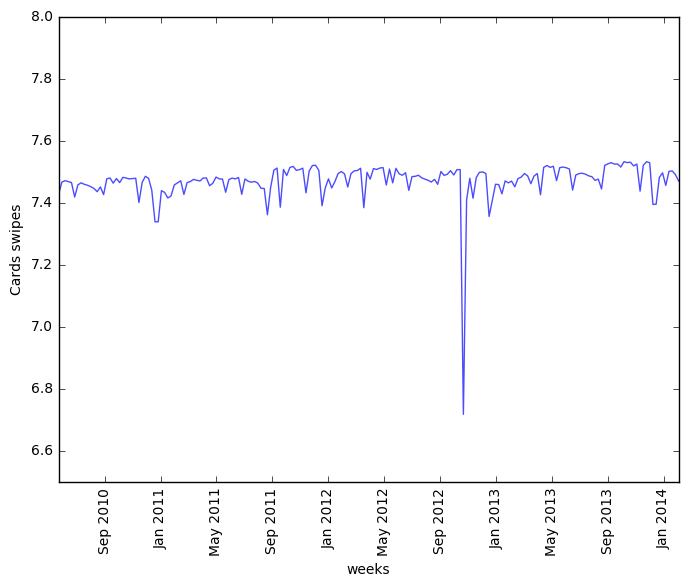

In [15]:
pl.figure(figsize=(8,6))
pl.xlabel('weeks')
pl.ylabel("Cards swipes")
pl.ylim(6.5, 8)

#using log10 plot to enhance visibility along the y axis
pl.plot(date_rng, np.log10(all_mtrides), 'b', alpha=0.7)
pl.xticks(rotation='90')

In [16]:
#identifying the event. (as shown on FDNY Example) 
#Find Mean and Std deviation
print ("cards_mean_byweek {:.2f}" .format(np.nanmean(all_mtrides)))
print ("stdev cards_mean_byweek {:.2f}" .format(np.nanstd(all_mtrides)))

thresholds = [np.nanmean(all_mtrides) +3 * np.nanstd(all_mtrides), 
             np.nanmean(all_mtrides) -3 *np.nanstd(all_mtrides)]

print ("+3 Std Dev Limit {:.2f} {:.2f}: " .format(*thresholds))
print ("earliest datapoint", min(date_rng))
all_mtrides.dtype

#beyond here I couldnt obtain the plot with the thresholds as shown on the FDNY example. I kept getting 
#"ValueError: setting an array element with a sequence."
#Lowest rides take place on october 23 that falls beyond the -3 threshold. 
#That day is (Hurricane Sandy Complete Subway Shutdown day) 

cards_mean_byweek 29781349.87
stdev cards_mean_byweek 2983960.42
+3 Std Dev Limit 38733231.14 20829468.61: 
earliest datapoint 2010-05-23 00:00:00


dtype('float64')

In [17]:
#axhspan(hl, ll, facecolor='0.5', alpha=0.5)

In [18]:
#ax = all_mtrides.flatten()

In [19]:
#plt.plot(logy=True, figsize=(10,10), style=".-", ms=20, color="IndianRed")
#plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
#pl.xticks(rotation=90, fontsize=15)
#pl.yticks(fontsize=20)
#pl.ylim(-20, pl.ylim()[1])
#pl.legend(fontsize=20)
#pl.ylabel("log deaths", fontsize=20)
#pl.xlabel("Date", fontsize=20)

In [20]:
#pl.figure(figsize=(8,6))
#pl.xlabel('weeks')
#pl.ylabel("Cards swipes")
#pl.ylim(7, 8)

#using log10 plot to enhance visibility along the y axis
#pl.plot(date_rng, np.log10(all_mtrides), 'b', alpha=0.7)
#pl.xticks(rotation='65')

#lower limit plot
#pl.plot(((min(date_rng), max(date_rng)), np.log10(thresholds[1]), np.log10(thresholds[1])), color='r', 
#        label='lower limit = %.2f'
#        % np.log10(thresholds[1]))

#higher limit plot
#pl.plot(((min(date_rng), max(date_rng)), np.log10(limits[0]), np.log10(limits[0])), 
#        color='bl', label='higher limit = %.2f' %np.log10(limits[0]))

#pl.legend(loc='lower left')

#figtext(0.1, 0.1, "Total swipes for all fares between the specified dates. \n")


#pl.plot((date_rng), max(date_rng)) 


In [21]:
all_mtrides = np.nansum(rides, axis = 0)


AttributeError: 'function' object has no attribute 'rtype'

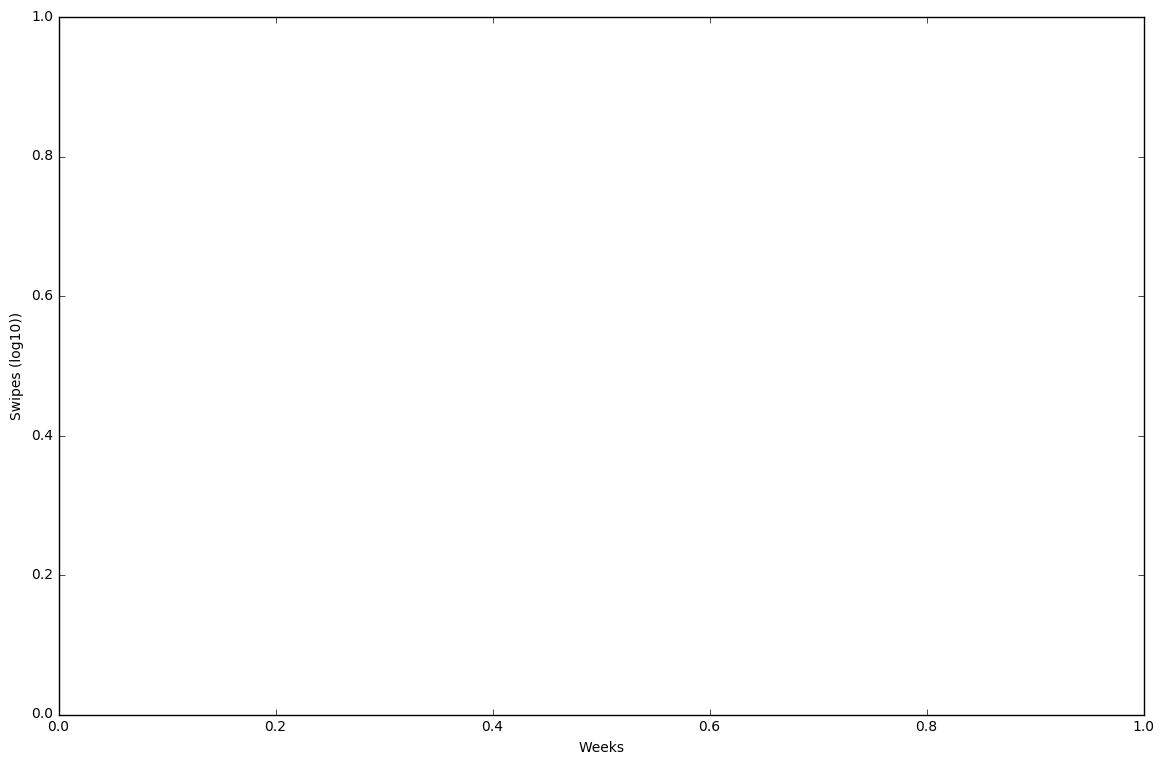

In [33]:
seqlen = len(all_colors_hex)

all_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]


def plot_cardtyp(range, rtype, color):
    pl.plot(range, np.log10(pd.stats.moments.rolling_mean(all_mtrides[cardtyp], 10)), color=color, 
           alpha = .7, label = ridetype[cardtyp])
    
pl.figure(figsize=(14, 9))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 
ax = plt.subplot(111)
    
curr_col = 0

fareSeriesRatios = {}

for n in range(0,len(all_mtrides)):
    
    if ((np.min(all_mtrides[n])) > 0):  
        plot.rtype(date_rng, n, all_colors_hex[curr_col])
        curr_col = (curr_col + 1)%seqlen
    
#begining (first ten weeks)
#end of the series (last ten weeks)
        
        begningSeries = all_mtrides[n,:10].sum()
        endSeries = all_mtrides[n,-10:].sum()
        seriesRatio = endSeries/begningSeries
        fareSeriesRatios[ridetype[n]] = (n,seriesRatio)

pl.xticks(rotation='45')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc='best', bbox_to_anchor=(1, 1))


In [ ]:
# If a ridership type popularity has increased, the ratio will be > 1 (ended with more rides that started)
# if it decreased, it will be the oposite. Lets plot them side by side

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Log10))") 
      
ax1.set_title('Increasing Popularity')
ax2.set_title('Decreased Popularity')

for key, value in fareSeriesRatios.items():
    if (fareSeriesRatios[key][1] > 1):
        ax1.plot(date_rng, np.log10(pd.stats.moments.rolling_mean(all_mtrides[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)
    else:
        ax2.plot(date_rng, np.log10(pd.stats.moments.rolling_mean(all_mtrides[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)

pl.show()


In [ ]:
downFare =  min(fareSeriesRatios.items(), key=lambda x: x[1][1])
upFare =  max(fareSeriesRatios.items(), key=lambda x: x[1][1])

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True,figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    pl.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Total))") 

ax1.set_title('Steepest Increase fare type: ' + upFare[0])
ax2.set_title('Steepest Decrease fare type: ' + downFare[0])

ax1.plot(date_rng, pd.stats.moments.rolling_mean(all_mtrides[fareSeriesRatios['sen'][0]],10)
         , alpha = .7, label = 'sen')

ax2.plot(date_rng, pd.stats.moments.rolling_mean(all_mtrides[fareSeriesRatios['month'][0]],10)
        , alpha = .7, label = 'month')

pl.show()

print ("Figure V: Total swipes per week for the steepest increase and decres fares" + '\n')

print ("The fare type with the steepest upware trend is " + upFare[0] + ", this fare went from an average " +
       '\n' + "of " + str(np.average(all_mtrides[ridetype(upFare[0])][:10])) + " swipes " +
       "per week during the first 10 weeks to an average of " 
       + str(np.average(all_mtrides[ridetype(upFare[0])][-10:])) + " during the last ten weeks")

print ('\n')

print ("The fare type with the steepest downard trend is " + downFare[0] + ", this fare went from an average " +
       '\n' + "of " + str(np.average(all_mtrides[ridetype.index(downFare[0])][:10])) + " swipes " +
       "per week during the first 10 weeks to an average of " 
       + str(np.average(all_mtrides[ridetype(downFare[0])][-10:])) + " during the last ten weeks")

In [ ]:
# rides per 23 stations 
print (rides.shape) #all dimensions
rides_mean0 = np.nanmean(rides, axis=0)
rides_allsum0 = np.nansum(rides, axis=0) #Axis along which the sum is cmptd is 0
print (rides_allsum0.shape)
rides_mean1 = np.nanmean(rides, axis=1)
rides_allsum1= np.nansum(rides, axis=1) #Axis along which the sum is cmptd is 1
print (rides_allsum1.shape)
len(rides_allsum0)
subway_allstations = np.nansum(rides, axis=1)
#len(subway_allstations)
#following https://github.com/fedhere/UInotebooks/blob/master/timeseries/fourier.ipynb and the updates

In [ ]:

mtarides_allStations = np.nansum(rides, axis=1)


N = len(mtarides_allStations[1])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

mtarides_allStations_yearPeriodicity = {}

for i in range (len(mtarides_allStations)):
    f = np.abs(np.fft.rfft(mtarides_allStations[i]))
    ffreq = np.fft.rfftfreq(N, 1.0)
    mtarides_allStations_power[i]=(ffreq,f)
    ax.plot(ffreq[2:], (f[2:]), '-')
    mtarides_allStations_yearPeriodicity[i]=((f[4]))

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Period (Weeks)", fontsize=15)
pl.ylabel("Power", fontsize=15)

ax.set_title('Power Spectrum for all 600 Subway stations in Manhattan', fontsize=20)